<a href="https://colab.research.google.com/github/holydiver-zerog/repository-public/blob/main/DLtest4_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# list4.8.py
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a8c65151ffed7ad82e0ea798217a432baf6b843b2bbe36874b92b250aaf0bb25
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [2]:
# list4.9.py
hand_name = ["グー", "チョキ", "パー"]
judge_name = ["あいこ", "勝ち", "負け"]

hand_data = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]
judge_data = [0, 1, 2, 2, 0, 1, 1, 2, 0]

x_train = x_test =  np.array(hand_data)
y_train = y_test = np.array(judge_data)

print("学習データ（問題）：")
print(x_train)
print(f"学習データ（答え）：{y_train}")

学習データ（問題）：
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
学習データ（答え）：[0 1 2 2 0 1 1 2 0]


In [3]:
# list4.10.py
model = keras.models.Sequential()
model.add(layers.Dense(8, activation="relu", input_dim=2))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# list4.11.py
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=1000,  #1000
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 1.3850 - val_accuracy: 0.2222 - val_loss: 1.3792
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.2222 - loss: 1.3792 - val_accuracy: 0.2222 - val_loss: 1.3735
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.2222 - loss: 1.3735 - val_accuracy: 0.2222 - val_loss: 1.3678
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2222 - loss: 1.3678 - val_accuracy: 0.2222 - val_loss: 1.3623
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2222 - loss: 1.3623 - val_accuracy: 0.2222 - val_loss: 1.3569
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.2222 - loss: 1.3569 - val_accuracy: 0.2222 - val_loss: 1.3515
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.2222 - loss: 1.3515 - val_accuracy: 0.2222 - val_loss: 1.3463
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.2222 - loss: 1.3463 - val_accuracy: 0.2222

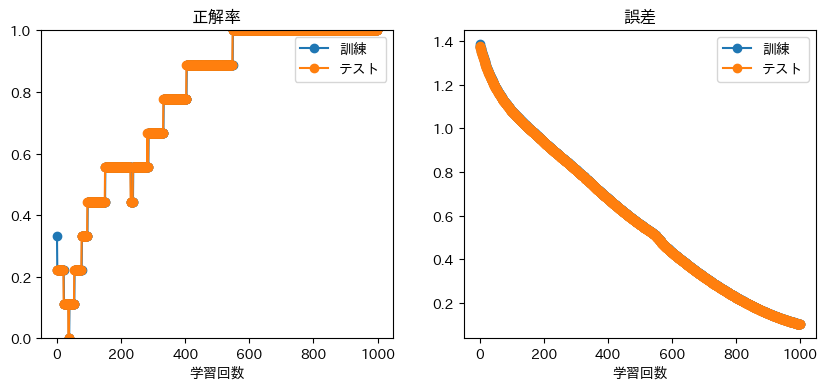

In [5]:
# list4.12.py
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

In [6]:
# list4.13.py
pre = model.predict(x_test)
for i in range(3):
    print(f"{pre[i][0]:.0%} {pre[i][1]:.0%} {pre[i][2]:.0%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
92% 7% 1%
2% 81% 17%
0% 12% 88%


In [7]:
# list4.14.py
for i in range(len(x_test)):
    hand1 = hand_name[x_test[i][0]]
    hand2 = hand_name[x_test[i][1]]
    index = np.argmax(pre[i])
    judge = judge_name[index]
    print(f"私は「{hand1}」、相手は「{hand2}」なので、{judge}")

私は「グー」、相手は「グー」なので、あいこ
私は「グー」、相手は「チョキ」なので、勝ち
私は「グー」、相手は「パー」なので、負け
私は「チョキ」、相手は「グー」なので、負け
私は「チョキ」、相手は「チョキ」なので、あいこ
私は「チョキ」、相手は「パー」なので、勝ち
私は「パー」、相手は「グー」なので、勝ち
私は「パー」、相手は「チョキ」なので、負け
私は「パー」、相手は「パー」なので、あいこ
